In [1]:
# Import all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime
from time import *
from sklearn import metrics

Read data into dataframe with dateparser

In [2]:
# Read data into dataframe with dateparser

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df = pd.read_csv('day.csv', parse_dates=['dteday'], date_parser=dateparse)


In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


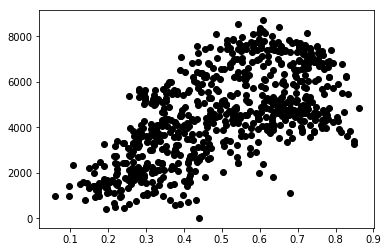

In [5]:
# Read data into dataframe with dateparser

plt.plot(df['temp'], df['cnt'], 'o', color='black');

In [6]:
# Read data into dataframe with dateparser
# Correlation between temp and cnt

df['temp'].corr(df['cnt'])

0.6274940090334918

C:\Users\Tony Stark\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


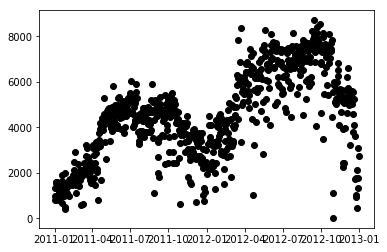

In [7]:
# Plotting cnt with respect to dteday

plt.plot(df['dteday'], df['cnt'], 'o', color='black')

In [10]:
# There is a clear seasonal trend where the total rental bikes seems to decrease during Winters i.e month of 
# January and Feburary of the year and the total rental bikes seems to increase during summers.
# The other trend which is quite evident is that the number of rental bike counts is increasing from year 2011 to year 2012.

# Change season from numerical to categirical

df['season_cat'] = pd.Categorical(df['season'])

Boxplot of cnt with respect to season

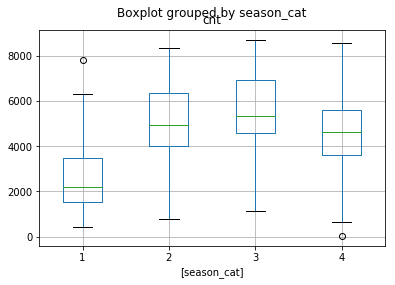

In [11]:
# Boxplot of cnt with respect to season

df[['season_cat', 'cnt']].boxplot(by ='season_cat')



> The box plot between the number of bike rentals and season shows that the line can not capture the non linear relationship and that there's is more rentals in winter as compared to spring.




Changing season to categorical and plotting boxplot



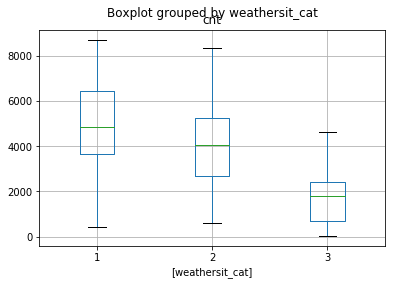

In [12]:
# The box plot between the number of bike rentals and season shows that the line can not capture the non linear
# relationship and that there's is more rentals in winter as compared to spring.

df['weathersit_cat'] = pd.Categorical(df['weathersit'])
df[['weathersit_cat', 'cnt']].boxplot(by = 'weathersit_cat')

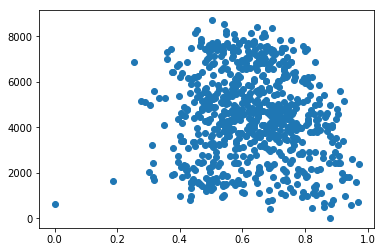

In [13]:
# During holidays there is very less bike rental during morning hours and it eventually increases after noon.

plt.plot(df['hum'], df['cnt'], 'o')

In [14]:
# It doesnt capture any meaningful relationship between humidity and target variable

df['hum'].corr(df['cnt'])

-0.10065856213715531

In [15]:
# There is also a worst correlation between humidity and cnt

df['windspeed'].describe()

count    731.000000
mean       0.190486
std        0.077498
min        0.022392
25%        0.134950
50%        0.180975
75%        0.233214
max        0.507463
Name: windspeed, dtype: float64

In [16]:
# Correlation between windspeed and cnt

df['windspeed'].corr(df['cnt'])

-0.23454499742167

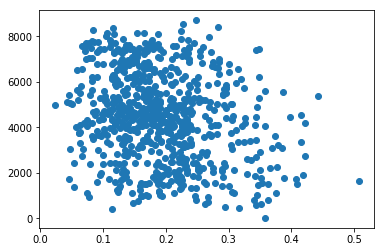

In [17]:
plt.plot(df['windspeed'], df['cnt'], 'o')

In [18]:
df['dteday'] = df['dteday'].map(datetime.toordinal)

In [19]:
dates = df['dteday']
dates = (dates-dates.min())/(dates.max()-dates.min())
df['dteday'] = dates

In [20]:
dates = df['yr']
dates = (dates-dates.min())/(dates.max()-dates.min())
df['yr'] = dates

In [21]:
# Correlation between dteday and cnt

df['dteday'].corr(df['cnt'])

0.6288302722083062

In [21]:
# Correlation between windspeed and temp

df['season'].corr(df['temp'])

0.3343148563990949

In [22]:
df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.289268,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.500000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [24]:
# Cost fuction

def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)
    J = J / (2 * m)
    return J

In [25]:
# Function to find RMSE

def RMSE(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B).astype(int) - Y) ** 2)    
    J = J**0.5
    J = J / (2 * m)
    return J

In [26]:
# Function to find R-squared value

def R_sqrd(X, Y, B):
  Ybar = np.mean(Y)
  ssreg = np.sum((X.dot(B) - Ybar)**2)
  sstot = np.sum((Y - Ybar)**2)
  return ssreg/sstot

In [27]:
# Function to do Linear Regression

def linear_regression(df, features, target):
  
  train_df = df[:int(len(df)*0.7)]
  test_df = df[int(len(df)*0.7):]
  m = len(train_df)
  x0 = np.ones(m)
  X = np.array([x0] + [train_df[x] for x in features]).T
  B = np.array([0] + [0 for x in features])
  Y = np.array(train_df[target])
  alpha = 0.0001
  inital_cost = cost_function(X, Y, B)
  print('Initial cost:', inital_cost)
  newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)
#   plot_ROC(Y, X.dot(newB))
  print(newB)
  print('RMSE on train:', RMSE(X, Y, newB))
  print('R squared value on train:', R_sqrd(X, Y, newB))
#   print(test_df)
  m = len(test_df)
  x0 = np.ones(m)
  X_ = np.array([x0] + [test_df[x] for x in features]).T
  Y_ = np.array(test_df[target])
  print('RMSE on test:', RMSE(X_, Y_, newB))
  print('R squared value on train:', R_sqrd(X_, Y_, newB))
  return newB

In [28]:
# Function to do gradient descent

def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [29]:
# Doing linear regression with the features and finding RMSE and R-squared

features = ['dteday', 'holiday', 'weekday',
       'workingday', 'hum', 'windspeed']
features = ['season', 'yr', 'mnth', 'temp', 'weathersit']
linear_regression(df, features, 'cnt')
print('Min. count',min(df['cnt']))
print('Max. count',max(df['cnt']))

Initial cost: 8453737.078277886
[1445.91356325  759.03302101 2061.06937797   -7.92474148 1655.87187535
 -478.89947287]
RMSE on train: 22.029837680382563
R squared value on train: 0.45231669359976956
RMSE on test: 47.11257892511518
R squared value on train: 0.17404490604303183
min count 22
max count 8714
